In [128]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FuncFormatter
import seaborn as sns
%matplotlib inline

In [151]:
conn = sqlite3.connect("db\\otomoto.db")
df = pd.read_sql_query("select * from car_article;", conn)
print(list(df))

['id', 'name', 'manufacturer', 'year', 'mileage', 'engine_capacity', 'engine_type', 'value', 'brutto', 'netto', 'negotiation', 'vat', 'currency', 'location', 'link', 'seller_id', 'record_created', 'on_delete']


In [152]:
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
reg = LinearRegression()

# fit transforme could be replaced by fit_transform() method


# transforme dates to labels
years = pd.to_datetime(df['year'], format='%Y-%m-%d')
years = years.apply(lambda x: x.year)
#encode years to classes
le.fit(years)
df['year'] = le.transform(years)

# filter articles
df = df[df['engine_capacity'] > 0.5]
df = df[df['currency'] == 'pln']

# care prices to float
df['value'] = df['value'].astype('float')
labels = df['value']

# encode names to classes
le.fit(df['name'])
df['name'] = le.transform(df['name']) 

# encode manufacturer to classes
le.fit(df['manufacturer'])
df['manufacturer'] = le.transform(df['manufacturer']) 

# encode location to classes
le.fit(df['location'])
df['location'] = le.transform(df['location'])

# drop unrelevant data
df = df.drop(['id', 'engine_type', 'currency', 'link', 'seller_id', 'record_created', 'on_delete', 'location', 'mileage'], axis=1)

# create traine set
train1 = df.drop(['value'], axis=1)

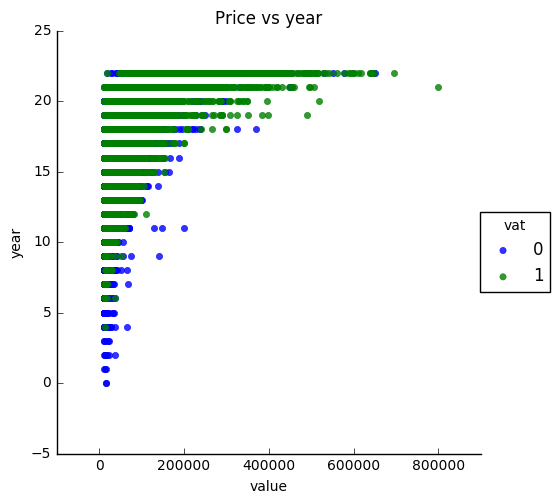

In [159]:
# plt.scatter(df['value'], df['year'])
# df.loc[:, ['value', 'year']]
sns.lmplot(x='value', y='year', data=df, fit_reg=False, hue='vat')
plt.title('Price vs year')
sns.despine()
plt.show()

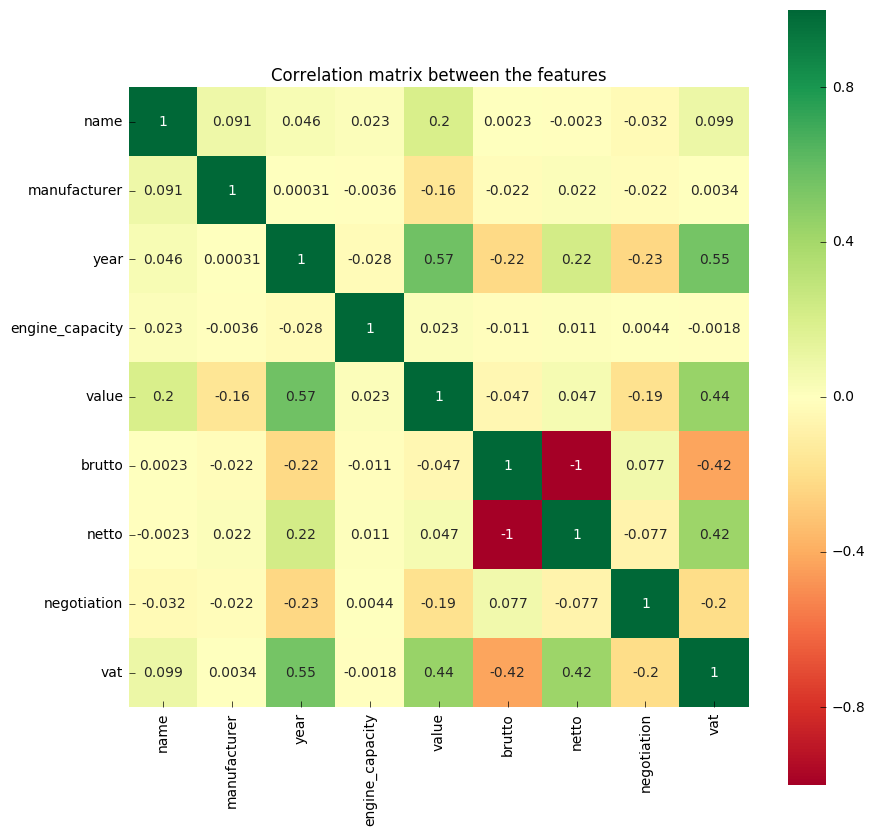

In [131]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True, cmap='RdYlGn')
plt.title('Correlation matrix between the features')
plt.show()

In [ ]:
# from sklearn.feature_selection import RFE

# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()

# rfe = RFE(model, 3)

# fit = rfe.fit(train1, labels)

# print("Num Features: %d") % fit.n_features_

# print("Selected Features: %s") % fit.support_

# print("Feature Ranking: %s") % fit.ranking_

In [133]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.1, random_state=2)

reg.fit(x_train, y_train)
score = reg.score(x_test, y_test) 
accuracy = int(reg.score(x_test, y_test) * 100) 
print('score: {}\naccurancy: {} %'.format(score, accuracy))

from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 155, max_depth = 4, min_samples_split = 2, learning_rate = 0.4, loss = 'ls') 
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test) 
accuracy = int(clf.score(x_test, y_test) * 100) 
print('score: {}\naccurancy: {} %'.format(score, accuracy))

score: 0.4534794537849812
accurancy: 45 %
score: 0.9301619446178766
accurancy: 93 %


In [136]:
r = clf.predict([[397, 30, 16, 1.6, 1, 0, 1, 0]])
print('Predicted value: ',r[0])
# print('Real value: ', df.iloc[5].value)
# print(df.iloc[5])
test_slice = df[df['name'] == 397].groupby('year')
print(test_slice.value.agg(['min', 'max', 'mean']))
print(test_slice.value.quantile([0.5]))
print(df[(df['name'] == 397) & (df['year'] == 16)])

Predicted value:  19633.7248883
          min      max          mean
year                                
13    12800.0  20900.0  16850.000000
14    17600.0  22000.0  19580.000000
15    25900.0  28900.0  27266.666667
16    12400.0  29900.0  20147.857143
17    10500.0  38500.0  22519.076923
18    13400.0  41400.0  24225.928571
19    15500.0  41900.0  28341.666667
20    16500.0  43900.0  27480.000000
21    19800.0  50500.0  42025.000000
22    53900.0  72700.0  63953.333333
year     
13    0.5    16850.0
14    0.5    19500.0
15    0.5    27000.0
16    0.5    19800.0
17    0.5    20900.0
18    0.5    23791.0
19    0.5    29200.0
20    0.5    26900.0
21    0.5    48900.0
22    0.5    64350.0
dtype: float64
       name  manufacturer  year  engine_capacity    value  brutto  netto  \
124     397            30    16              1.6  12400.0       1      0   
150     397            30    16              1.6  12700.0       1      0   
549     397            30    16              1.6  15447.0    

In [7]:
from sklearn import metrics

# print(metrics.classification_report([int(v) for v in df['value'].astype('float')], [int(v) for v in r]))
# print(metrics.confusion_matrix(df['value'], r))

# [int(v) for v in df['value'].astype('float')][1]
# [int(v) for v in r][1]
# [float(v) for v in labels]
# [float(v) for v in r]
print(metrics.classification_report([int(v) for v in labels], [int(v) for v in r]))
# for idx, i in enumerate(r):
#     print(int(i), df['value'].iloc[idx])

             precision    recall  f1-score   support

        385       0.00      0.00      0.00         0
       1642       0.00      0.00      0.00         0
       2390       0.00      0.00      0.00         1
       2600       0.00      0.00      0.00         1
       2800       0.00      0.00      0.00         1
       3361       0.00      0.00      0.00         0
       3373       0.00      0.00      0.00         0
       3390       0.00      0.00      0.00         1
       3400       0.00      0.00      0.00         1
       3500       0.00      0.00      0.00         1
       3800       0.00      0.00      0.00         3
       4150       0.00      0.00      0.00         1
       4290       0.00      0.00      0.00         1
       4300       0.00      0.00      0.00         1
       4400       0.00      0.00      0.00         1
       4700       0.00      0.00      0.00         3
       4800       0.00      0.00      0.00         1
       4850       0.00      0.00      0.00   

h:\python_3_4_2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
h:\python_3_4_2\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
